# Success and Failure of Terrorist Attacks

In [1]:
# Importing the required packages
import os
import glob
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating the path to read the input file
home_path = os.path.expanduser("~")
data_path = home_path+"\\final\\Data\\*"

In [3]:
# Looping through each filename in above path and selecting the required file
for file in glob.glob(data_path):
    with open(file, errors='ignore') as source:
        ana_3_data = pd.read_csv(source, low_memory=False, encoding='ISO-8859-1',
                          usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103])
ana_3_data.head(2)

,eventid,iyear,imonth,iday,country_txt,provstate,latitude,longitude,success,attacktype1_txt,targtype1_txt,targsubtype1_txt,weaptype1_txt,nkill,nwound
0,2.000000e+11,2001,1,0,Colombia,Valle del Cauca,3.800889,-76.641271,1,Unknown,Private Citizens & Property,Farmer,Unknown,3.0,0.0
1,2.000000e+11,2001,1,1,Yemen,Adan,12.787916,44.984045,1,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Explosives/Bombs/Dynamite,0.0,0.0


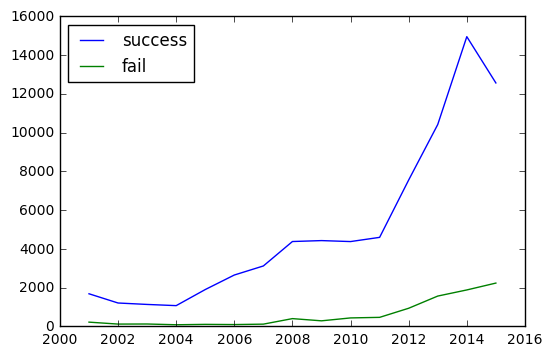

In [14]:
# Renaming the columns
ana_3_data = ana_3_data.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'success':'success','targtype1_txt':'target', 
             'targsubtype1_txt' : 'targetsub',
             'weaptype1_txt':'weapon', 'attacktype1_txt':'attack',
             'nkill':'fatalities', 'nwound':'injuries'})

# Replacing NAN with 0
ana_3_data['fatalities'] = ana_3_data['fatalities'].fillna(0).astype(int)
ana_3_data['injuries'] = ana_3_data['injuries'].fillna(0).astype(int)

# Replacing day with a value of 0 to 1
ana_3_data['day'][ana_3_data.day == 0] = 1
# Replacing month with a value of 0 to 1
ana_3_data['month'][ana_3_data.month == 0] = 1
# Creating a date for each incident
ana_3_data['date'] = pd.to_datetime(ana_3_data[['day', 'month', 'year']])

# Creating a data frame to store success count yearwise
success_count = ana_3_data[ana_3_data.success == 1]['year'].value_counts().sort_index()
# Creating a data frame to store failure count yearwise
fail_count = ana_3_data[ana_3_data.success == 0]['year'].value_counts().sort_index()

# Plotting a line chart to display success and failed attack counts yearwise
plt.plot(success_count, label="success")
plt.plot(fail_count, label="fail")
plt.legend(loc=2)
plt.show

# Saving the plot in png format
plt.savefig('ana_3\\successVSfail.png', bbox_inches='tight')

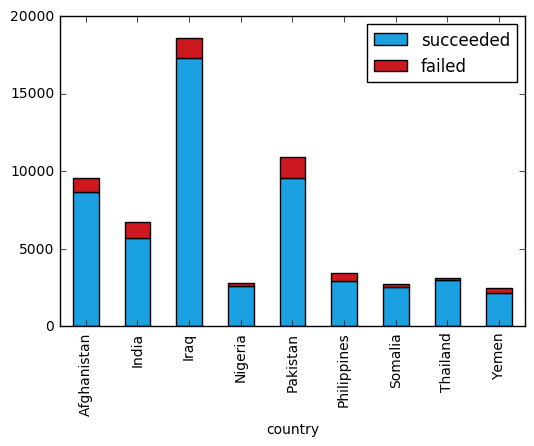

In [11]:
# Creating a dataframe to store the count of successful terror attacks countrywise
count_by_country = ana_3_data[ana_3_data.success == 1].groupby('country').count()['date']

# Creating a dataframe to store countries where terror attack count is greater than 500
filtered_attack = pd.DataFrame(index=count_by_country[count_by_country > 500].index.unique())

# Creating two columns in above dataframe to store succeeded and failed terror attack count countrywise
filtered_attack["succeeded"] = ana_3_data[ana_3_data.success == 1].groupby('country')['date'].count().fillna(0)
filtered_attack["failed"] = ana_3_data[ana_3_data.success != 1].groupby('country')['date'].count().fillna(0).sort_values(0,ascending=False)

# Creating stacked bar plot to display countryname and number of failed and succeeded terror attacks
filtered_attack[(filtered_attack.failed > 0) & ((filtered_attack.succeeded + filtered_attack.failed) > 2000)].plot(kind='bar', stacked=True, color = ['#1ba1e2', '#cc181e'])

# Saving the plot in png format
plt.savefig('ana_3\\successVSfail_country.png', bbox_inches='tight')